EE-311
======

Lab 2: NumPy, Matplotlib and Scikit-learn (linear regression example)
---------------------------------------------------------------------

created by François Marelli on 03.03.2021

# Introduction to NumPy and Matplotlib

NumPy is a Python library implementing multi-dimensional arrays and matrices and efficient mathematical functions.

NumPy is often imported with the alias "np" for ease of use, using the following syntax:

In [1]:
import numpy as np

As opposed to Python lists, NumPy arrays can contain only one type of data. We will only use them for integers or floats.

There are many ways to create NumPy arrays, for example from lists.

In [2]:
a_list = [1, 2, 3]

a_array = np.array(a_list)

print(a_array, type(a_array))

[1 2 3] <class 'numpy.ndarray'>


Arrays can be multidimensional, as shown in the example below. They are characterized by the following values:

* `size`: the number of elements in the array
* `ndim`: the number of dimensions of the array
* `shape`: the length of each dimension of the array

In [3]:
# Multi-dimensional arrays can be created from nested lists
array = np.array([[1, 2, 3], [4, 5, 6]])

print('Size:', array.size)
print('Ndim:', array.ndim)
print('Shape:', array.shape)

Size: 6
Ndim: 2
Shape: (2, 3)


Arrays can also be created using functions and specifying their characteristics (shape, type, ...). The example below shows the following:

* `np.ones`: create a matrix full of ones
* `np.zeros`: create a matrix full of zeros
* `np.empty`: create an empty matrix (**in practice the memory is not written, so it is full of random values**)

In [4]:
# Create matrices by giving shape and type
# As shape is the first argument, it does not need to be named
# The default type is float

ones = np.ones(shape=(2, 3), dtype=int)
zeros = np.zeros((2, 3))

# We can have as many dimensions as we want! For example, here we have 3.
empty = np.empty((3,2,4))

print('Ones')
print(ones)

print('\nZeros')
print(zeros)

print('\nEmpty')
print(empty)

Ones
[[1 1 1]
 [1 1 1]]

Zeros
[[0. 0. 0.]
 [0. 0. 0.]]

Empty
[[[4.64355141e-310 0.00000000e+000 9.82157975e+252 8.89489936e+252]
  [6.01346954e-154 6.01347002e-154 6.01347002e-154 7.49877502e+247]]

 [[6.96742172e+252 6.72775467e+199 1.19490107e+190 5.08200698e+233]
  [1.53336497e-094 6.01347002e-154 6.01347002e-154 6.01347002e-154]]

 [[1.88556770e+122 4.96820036e+180 6.80600993e+212 1.10317376e+217]
  [1.19490107e+190 2.06642651e+161 5.44760669e-109 1.95435809e-311]]]


## Read the docs!

When using libraries, it is always useful to keep the documentation at hand. It provides detailed information about its functions, their parameters and return values. For example, check the documentation of `np.full`: <https://numpy.org/doc/stable/reference/generated/numpy.full.html>

At the top, you find the name of the function and its arguments (you can also see the default values there). It is followed by a detailed list of the argument types and their meaning in the function. Finally, the return values are explained and example use cases are given.

Remember to always check the documentation when you want to know what a function does, or what an argument means. It can also be very helpful in solving bugs in code. The search tool (top left) will be very handy!

According the documentation of `np.full`, what do you expect the following cell to do?

In [5]:
array = np.full((3, 4, 2), 42, float)

print(array)

[[[42. 42.]
  [42. 42.]
  [42. 42.]
  [42. 42.]]

 [[42. 42.]
  [42. 42.]
  [42. 42.]
  [42. 42.]]

 [[42. 42.]
  [42. 42.]
  [42. 42.]
  [42. 42.]]]


## Operation over arrays

NumPy allows to apply mathematical operations to arrays. Standard operators will apply to matrices element-wise, as shown in the example below:

In [6]:
# Tuples can be defined without parentheses
shape = 2, 3

ones = np.ones(shape)
twos = np.full(shape, 2)

sum_result = ones + twos
prod_result = ones * twos

print('Sum')
print(sum_result)

print('\nProduct')
print(prod_result)

print('\nScalar sum')
print(ones + 2)

Sum
[[3. 3. 3.]
 [3. 3. 3.]]

Product
[[2. 2. 2.]
 [2. 2. 2.]]

Scalar sum
[[3. 3. 3.]
 [3. 3. 3.]]


Matrix product (dot product) is computed using `np.dot`, or the operator `@`. Be aware that the dimensions must match the standard rules for matrix product!

In [7]:
a = np.ones((2, 3))
b = np.ones((3, 4))

c = a@b

# Alternative 1
c1 = np.dot(a, b)

# Alternative 2
c2 = a.dot(b)

print('Shape of a:', a.shape)
print('Shape of b:', b.shape)
print('\nShape of a@b:', c.shape)

print('\nChecking the results:')
print('\na@b')
print(c)
print('\nnp.dot(a,b)')
print(c1)
print('\na.dot(b)')
print(c2)

Shape of a: (2, 3)
Shape of b: (3, 4)

Shape of a@b: (2, 4)

Checking the results:

a@b
[[3. 3. 3. 3.]
 [3. 3. 3. 3.]]

np.dot(a,b)
[[3. 3. 3. 3.]
 [3. 3. 3. 3.]]

a.dot(b)
[[3. 3. 3. 3.]
 [3. 3. 3. 3.]]


NumPy also adds mathematical functions to be applied to arrays, such as for example: `np.exp`, `np.log`, `np.power`.

In [8]:
twos = np.full(shape, 2)

cube = np.power(twos, 3)
print('Cube of a matrix of 2:')
print(cube)

print('\nCube of a matrix of 2 using **:')
print(twos ** 3)

# A bit more complex: each element has its own power
powers = np.array([[0, 1, 2], [3, 4, 5]])

result = np.power(twos, powers)
print('\nDifferent powers of 2')
print(result)

Cube of a matrix of 2:
[[8 8 8]
 [8 8 8]]

Cube of a matrix of 2 using **:
[[8 8 8]
 [8 8 8]]

Different powers of 2
[[ 1  2  4]
 [ 8 16 32]]


NumPy also adds functions that can be computed on the arrays, such as `np.max`, `np.min`, `np.sum`, `np.std`, `np.mean`.

They can be called in two ways:

In [9]:
ones = np.ones(shape)

print('np.sum(ones):\t', np.sum(ones))
print('ones.sum():\t', ones.sum())

np.sum(ones):	 6.0
ones.sum():	 6.0


These functions can also be called over a specific axis only. In the example below, the sum is computed only over the last axis. Since the original shape is (2, 3) and we sum over the last dimension, it collapses and we end up with only the first dimension left (shape: 2).

In [10]:
partial_sum = np.sum(ones, axis=-1)

print('Ones:')
print(ones)

print('\nShape:')
print(ones.shape)

print('\nSum over the last dimension:')
print(partial_sum)

Ones:
[[1. 1. 1.]
 [1. 1. 1.]]

Shape:
(2, 3)

Sum over the last dimension:
[3. 3.]


## Dimensions and indexing

Indexing arrays works the same as with Python lists (including slices, negative indexes, ...). One index (or slice) must be given for each dimension of the array.

In [11]:
array = np.array([[1, 2, 3], [4, 5, 6]])

print('Array:')
print(array)

print('\nSlice of the second row:')
print(array[1, 1:3])

Array:
[[1 2 3]
 [4 5 6]]

Slice of the second row:
[5 6]


Arrays can be indexed using boolean masks to access all elements fulfilling a condition. They can be created by using conditional expressions:

In [12]:
a = np.array([[1, 2, 3], [4, 5, 6]])

mask = a % 2 == 0

indexed = a[mask]

print('Mask:')
print(mask)

print('\nArray:')
print(a)

print('\nIndexed array:')
print(indexed)

Mask:
[[False  True False]
 [ True False  True]]

Array:
[[1 2 3]
 [4 5 6]]

Indexed array:
[2 4 6]


Masks can be combined using `&` for and logic, and `|` for or.

In [13]:
a = np.array([[1, 2, 3], [4, 5, 6]])

mask1 = a % 2 == 0

mask2 = a > 3

and_mask = mask1 & mask2

or_mask = mask1 | mask2

print('Mask 1:')
print(mask1)

print('\nMask 2:')
print(mask2)

print('\nAnd mask:')
print(and_mask)

print('\nOr mask:')
print(or_mask)

Mask 1:
[[False  True False]
 [ True False  True]]

Mask 2:
[[False False False]
 [ True  True  True]]

And mask:
[[False False False]
 [ True False  True]]

Or mask:
[[False  True False]
 [ True  True  True]]


It is possible to add new dimensions using `np.newaxis`, and to remove empty dimensions using `np.squeeze`

In [14]:
a = np.empty((1, 3, 4))

print('Original shape:')
print(a.shape)

# Adding an axis in 3rd position
b = a[:, :, np.newaxis, :]

print('\nAfter new axis:')
print(b.shape)

# Removing all empty dimensions
c = np.squeeze(b)

print('\nAfter squeeze:')
print(c.shape)

Original shape:
(1, 3, 4)

After new axis:
(1, 3, 1, 4)

After squeeze:
(3, 4)


## Making graphs using Matplotlib

Matplotlib (more specifically pyplot) is a Python library allowing us to easily create graphs from NumPy arrays. It is usually imported as plt:

In [15]:
from matplotlib import pyplot as plt

We can use the `plt.plot` function to plot a curve. Its first argument is a list (or array) of x values, and its second argument is a list (or array) of y values. They should have the same size. When the plot is ready to be shown, we call `plt.show`.

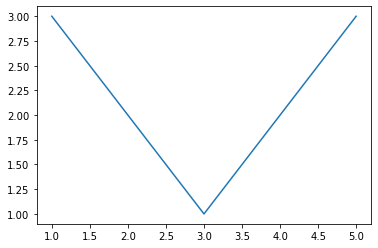

In [16]:
x = [1, 2, 3, 4, 5]
y = [3, 2, 1, 2, 3]

plt.plot(x, y)
plt.show()

A more practical way to create x is to use NumPy. For example, we can use `np.arange` to create a range of values (from min to max with given step), or `np.linspace` to create an array of evenly spaced values (from min to max, N values). See the difference below (notably, the max value is not included in arange, but it is in linspace), where we create two arrays of the same size:

In [17]:
arange = np.arange(0, 10, 2)

print('Arange (0, 10, 2):', arange)

linspace = np.linspace(0, 10, 5)
print('Linspace (0, 10, 5):', linspace)

Arange (0, 10, 2): [0 2 4 6 8]
Linspace (0, 10, 5): [ 0.   2.5  5.   7.5 10. ]


We can then use NumPy operations to create y from x. 

If we call plot multiple times (without show), all the curves appear on the same figure.

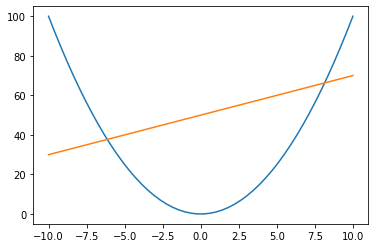

In [18]:
x = np.linspace(-10, 10, 50)

y1 = x ** 2

y2 = 2 * x + 50

plt.plot(x, y1)
plt.plot(x, y2)

plt.show()

The plot function can do a lot more, see the docs for full details <https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html>.

In the following example, we change the plot style in the first additional argument. It reads as follow: linestyle, then color (for example: ':r' means dotted line - red). The "label" argument gives a name to the curve, which is then shown on the figure by calling `plt.legend`.

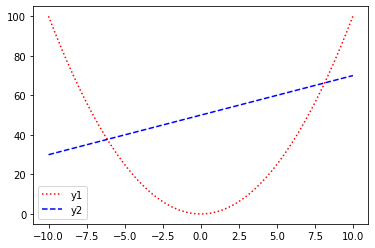

In [19]:
plt.plot(x, y1, ':r', label='y1')
plt.plot(x, y2, '--b', label='y2')

plt.legend()

plt.show()

If we instead want multiple figures, we can use `plt.figure` to create new graphs. You can also use it to specify the size of the figure.

We use `plt.xlabel`, `plt.ylabel` and `plt.title` to add titles and labels to the axes. It has to be done separately for each figure.

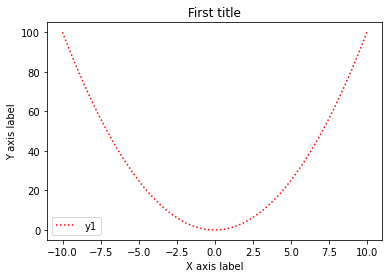

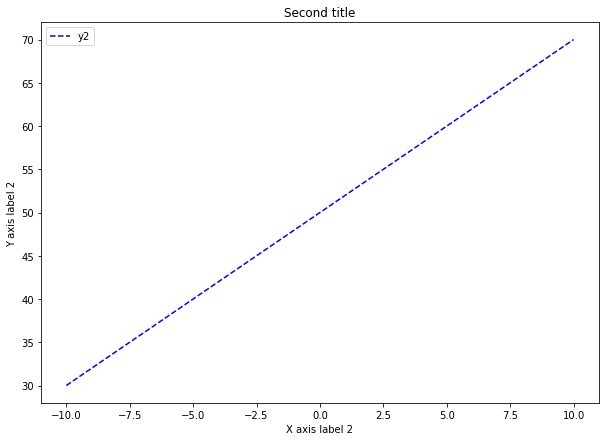

In [20]:
plt.plot(x, y1, ':r', label='y1')
plt.legend()

plt.xlabel('X axis label')
plt.ylabel('Y axis label')
plt.title('First title')

# Size is optional, given as (width, height)
plt.figure(figsize=(10, 7))

plt.plot(x, y2, '--b', label='y2')
plt.legend()

plt.xlabel('X axis label 2')
plt.ylabel('Y axis label 2')
plt.title('Second title')

plt.show()

`plt.scatter` takes similar arguments to plot, but it produces point clouds instead of curves. See the example below:

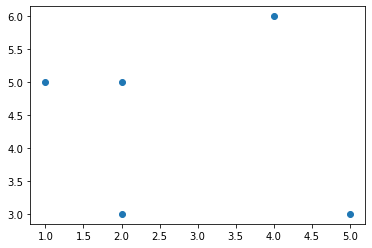

In [21]:
x = [2, 1, 2, 5, 4]
y = [3, 5, 5, 3, 6]

plt.scatter(x, y)
plt.show()

# Scikit-learn: linear regression

Scikit-learn is a Python library implementing machine learning algorithms. We will use it to illustrate the concepts presented during the lectures. It is imported under the name `sklearn`.

## Importing libraries

This will be the first step in most labs: importing all the libraries and functions we need for later.

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

## Preparing the dataset

For this lab, we will use the Wine dataset. It contains the results of a chemical analysis of some Italian wines (more info: <https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset>). Based on this dataset, we will try to predict the alcohol degree of a wine based on the intensity of its colour.

**Prepare the dataset**

* Select the intensity of the colour in `wine_X`, as it will be our base feature for the prediction
* Select the alcohol degree in `wine_y`, as it will be the value we try to predict
* Scikit-learn does not accept 1D data for `X`, so add an empty dimension at the end of `wine_X`
* Split `wine_X` and `wine_y` into train and test sets: select the last 10 samples of the dataset for testing

**Answer the following:**

1. How many datapoints does the dataset contain?
2. How many features does the full dataset have?
3. What are the minimum and maximum values for both X and y?
4. How many points have a colour intensity above 5?
5. How many points have an alcohol degree strictly comprised between 12 and 13?
6. How many points satisfy both these conditions simultaneously?
7. What is the mean alcohol degree in the dataset?

In [23]:
# Load the dataset
wine_full, _ = datasets.load_wine(return_X_y=True)


##########################################################################
# Code here

# Keep only the required features
wine_X = wine_full[:, 9]
wine_y = wine_full[:, 0]

# Add an empty dimension
wine_X = wine_X[:, np.newaxis]

# Split the data into training/testing sets
wine_X_train = wine_X[:-10]
wine_X_test = wine_X[-10:]

# Split the targets into training/testing sets
wine_y_train = wine_y[:-10]
wine_y_test = wine_y[-10:]


# Use conditional expressions to answer the questions
mask_a = wine_X > 5

mask_b = (wine_y > 12) & (wine_y < 13)

mask_c = np.squeeze(mask_a) & mask_b

print('1. Datapoints :', wine_full.shape[0])
print('2. Features :', wine_full.shape[1])
print('4. a) Min/max values for X: {:.02f} - {:.02f}'.format(wine_X.min(), wine_X.max()))
print('   b) Min/max values for y: {:.02f} - {:.02f}'.format(wine_y.min(), wine_y.max()))
print('4. Points with intensity higher than 5:', mask_a.sum())
print('5. Points with alcohol degree between 11 and 13:', mask_b.sum())
print('6. Points satisfying both conditions:', mask_c.sum())
print('7. Mean alcohol degree in the dataset: {:.02f}'.format(wine_y.mean()))

1. Datapoints : 178
2. Features : 13
4. a) Min/max values for X: 1.28 - 13.00
   b) Min/max values for y: 11.03 - 14.83
4. Points with intensity higher than 5: 80
5. Points with alcohol degree between 11 and 13: 64
6. Points satisfying both conditions: 16
7. Mean median income in block group: 13.00


## Plotting the dataset

It is always a good idea to start with plotting the data. It helps visualize it and possibly identify interesting properties.

In the following scatter plot, it appears that the relationship between colour intensity and alcohol degree follows a roughly linear trend.

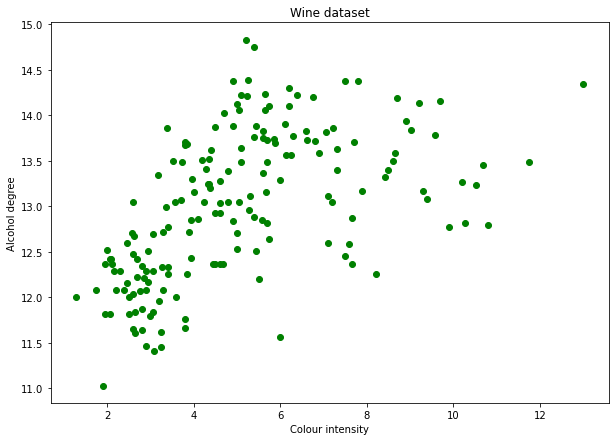

In [24]:
plt.figure(figsize=(10, 7))

plt.scatter(wine_X, wine_y,  color='green')

plt.xlabel('Colour intensity')
plt.ylabel('Alcohol degree')
plt.title('Wine dataset')

plt.show()

## Linear regression

We want to be able to predict the alcohol degree of wine based on its colour intensity using linear regression.

*Reminder: linear regression consists in trying to fit a straight line through the dataset to approximate it best, new values can then be predicted to be on that line.*

Using Scikit-learn, we create a linear regression model. We then fit it on the dataset to compute its optimal parameters. This workflow is similar for all models in Scikit-learn.

Once the model is trained, we print the obtained coefficients (in this case, the slope of the linear regression).

In [25]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(wine_X_train, wine_y_train)

# Print the optimal coefficients
print('Slope of the model: ', regr.coef_)

Slope of the model:  [0.20529887]


### Testing the obtained model

To quantify the quality of our model, we try predicting the mean prices for points in our test subset (they were not present in the train set, **the model has never seen them!**). We can then compute a measure of error, like for example the Mean Squared Error (MSE) over the predicted values.

$$ MSE = \frac{\Sigma (y - \tilde{y})^2}{N}$$

**Compute the MSE over the test set by yourself, and validate it against the result from Scikit-learn.**

In [26]:
# Make predictions using the testing set
wine_y_pred = regr.predict(wine_X_test)

# Compute the MSE
mse = mean_squared_error(wine_y_test, wine_y_pred)

# The mean squared error
print('Mean squared error: {:.2f}'.format(mse))


################################################################
# Code here

mse_manual = np.power(wine_y_pred - wine_y_test, 2).mean()

print('Manual MSE: {:.2f}'.format(mse_manual))

Mean squared error: 0.38
Manual MSE: 0.38


## Plotting the results

We want to show our results on a scatter plot. The following cell shows the points from the training set.

**Add the points from the test set to the graph, and then draw the line corresponding to the predicted values from the model. Use the color red for readability.**

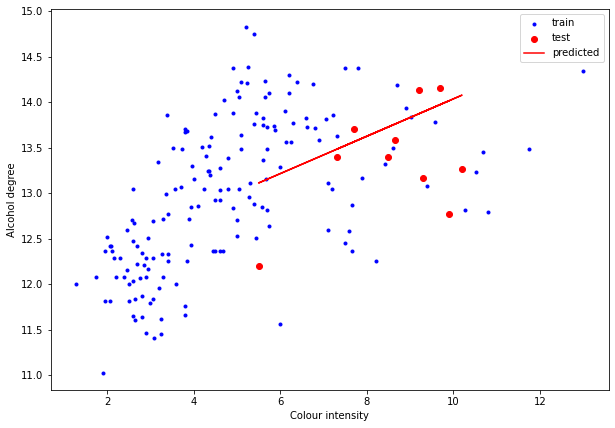

In [27]:
plt.figure(figsize=(10, 7))

plt.scatter(wine_X_train, wine_y_train, marker='.', color='blue', label='train')


######################################################################################
# Code here

plt.scatter(wine_X_test, wine_y_test, color='red', label='test')
plt.plot(wine_X_test, wine_y_pred, color='red', label='predicted')

######################################################################################


plt.legend()

plt.xlabel('Colour intensity')
plt.ylabel('Alcohol degree')

plt.show()

## Equations of the  model

We recall that underlying equation of the linear regression model is just a line: $y = a X + b$.

**Get the parameters of our trained model, and use them to manually compute this line and plot it on the figure below. It should overlap with the predictions of the model already shown.**

Hint: the documentation is your friend, check the attributes section
(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression)

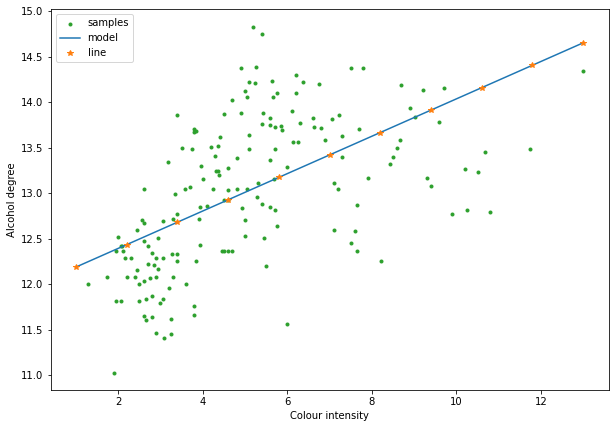

In [28]:
data_X = np.linspace(1, 13, 11)[..., np.newaxis]
data_y = regr.predict(data_X)

plt.figure(figsize=(10, 7))

plt.scatter(wine_X, wine_y, marker='.', color='C2', label='samples')
plt.plot(data_X, data_y, label='model')


#######################################################################
# Code here!

slope = regr.coef_
origin = regr.intercept_

y = slope * data_X + origin

plt.plot(data_X, y, '*', label='line')

#######################################################################


plt.legend()
plt.xlabel('Colour intensity')
plt.ylabel('Alcohol degree')

plt.show()

## What happens inside?

The linear regression (with L2 loss) problem $\vec{y} = X \vec\beta$ has a known analytical solution: 

$$ \vec\beta^* = (X^TX)^{-1}X^T\vec{y} $$

When fitting a linear regression model over our data, Scikit-learn solves this for us.

**Implement this equation and check that you get the same result as when using Scikit-learn.**

Hint: you will need
* `array.T` for transpose
* `np.linalg.inv(array)` for inverse
* `np.concatenate` for something... 

*Do not forget to add a column of 1 in X, otherwise the independent term is not computed => create X = (1 X)*

In [29]:
regr = linear_model.LinearRegression().fit(wine_X, wine_y)

beta = np.array((regr.intercept_, regr.coef_[0]))
print('Scikit beta = ', beta)


############################################################
# Code here

ones = np.ones((wine_X.shape[0], 1))
X = np.concatenate([ones, wine_X], axis=1)

beta = np.linalg.inv(X.T @ X) @ (X.T @ wine_y)

print('Manual beta = ', beta)

Scikit beta =  [12.03286386  0.19132798]
Manual beta =  [12.03286386  0.19132798]
